## 0. Load libraries dan dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df_train = pd.read_csv('data_train.csv')
df_test = pd.read_csv('data_test.csv')
df_validate = pd.read_csv('data_validate.csv')

## 1. Descriptive analysis

In [3]:
# Preview dataset
df_train.head()

,ID,Age,Gender,Employed,Graduate,Work Exp,Salary,Distance,Licence,Transport
0,0,35,Female,Yes,0.0,15,37.0,13.5,1,Private Transport
1,1,29,Female,No,0.0,7,14.6,9.2,0,Other
2,2,29,Female,No,0.0,7,14.6,7.7,0,Public Transport
3,3,25,Female,No,0.0,3,9.9,14.6,0,Public Transport
4,4,28,Male,Yes,0.0,5,13.6,7.9,0,Public Transport


In [4]:
# Preview dataset
df_validate.head()

,ID,Age,Gender,Employed,Graduate,Work Exp,Salary,Distance,Licence,Transport
0,0,29,Male,Yes,0.0,11,22.7,11.3,1,Other
1,1,28,Male,Yes,0.0,5,13.9,12.2,1,Other
2,2,31,Male,No,1.0,7,15.9,9.7,0,Public Transport
3,3,36,Male,Yes,1.0,16,34.8,9.2,0,Public Transport
4,4,24,Male,Yes,1.0,1,7.9,10.5,0,Public Transport


In [5]:
# Preview dataset
df_test.head()

,ID,Age,Gender,Employed,Graduate,Work Exp,Salary,Distance,Licence
0,0,23,Female,No,0.0,4,11.6,10.7,0
1,1,28,Male,Yes,1.0,5,14.8,10.8,1
2,2,27,Male,Yes,1.0,5,13.7,12.6,0
3,3,32,Female,Yes,0.0,14,30.9,16.5,0
4,4,29,Female,Yes,0.0,7,14.8,11.7,0


In [6]:
print('Data Train - Rows: {} Columns: {}'.format(df_train.shape[0], df_train.shape[1]))
print('Data Validate - Rows: {} Columns: {}'.format(df_validate.shape[0], df_validate.shape[1]))
print('Data Test - Rows: {} Columns: {}'.format(df_test.shape[0], df_test.shape[1]))

Data Train - Rows: 266 Columns: 10
Data Validate - Rows: 89 Columns: 10
Data Test - Rows: 89 Columns: 9


* Data train hanya memiliki 266 instance.
* Data train dan data validate memiliki total 10 kolom: 9 atribut dan 1 label.
* Data test hanya memiliki 9 kolom: tidak ada label.

In [7]:
# Features data-type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         266 non-null    int64  
 1   Age        266 non-null    int64  
 2   Gender     266 non-null    object 
 3   Employed   266 non-null    object 
 4   Graduate   265 non-null    float64
 5   Work Exp   266 non-null    int64  
 6   Salary     266 non-null    float64
 7   Distance   266 non-null    float64
 8   Licence    266 non-null    int64  
 9   Transport  266 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 20.9+ KB


Tiga atribut dari dataset bertipe object / categorical.

In [8]:
# Statistical summary
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,266.0,132.500000,76.931788,0.0,66.25,132.50,198.750,265.0
Age,266.0,27.721805,4.513884,18.0,25.00,27.00,30.000,42.0
Graduate,265.0,0.241509,0.428808,0.0,0.00,0.00,0.000,1.0
Work Exp,266.0,6.319549,5.171708,0.0,3.00,5.00,8.000,22.0
Salary,266.0,16.259774,10.575340,6.7,9.80,13.55,15.675,57.0
Distance,266.0,11.383459,3.703363,3.2,8.80,11.00,13.600,22.8
Licence,266.0,0.229323,0.421190,0.0,0.00,0.00,0.000,1.0


In [9]:
# Check for null values
round((df_train.isnull().sum() / df_train.shape[0]) * 100, 2).astype(str) + ' %'

ID            0.0 %
Age           0.0 %
Gender        0.0 %
Employed      0.0 %
Graduate     0.38 %
Work Exp      0.0 %
Salary        0.0 %
Distance      0.0 %
Licence       0.0 %
Transport     0.0 %
dtype: object

Terdapat nilai null (missing values) pada atribut Graduate.

In [10]:
# Checking the counts of label categories
transport = df_train['Transport'].value_counts(normalize=True)
round(transport * 100, 2).astype('str') + ' %'

Public Transport     65.79 %
Other                19.55 %
Private Transport    14.66 %
Name: Transport, dtype: object

### Hasil analisis:
* Data train memiliki jumlah yang sangat sedikit yaitu 200 instance.
* Adanya nilai null / missing values pada atribut 'Graduate' yang nantinya harus di-preprocess.
* Dataset bersifat imbalanced dimana label 'Transport' berisi 65.8% untuk 'Public Transport', 19.55% untuk 'Other', dan 14.6% untuk 'Private Transport'.   

## 2. Exploratory Data Analysis (EDA)

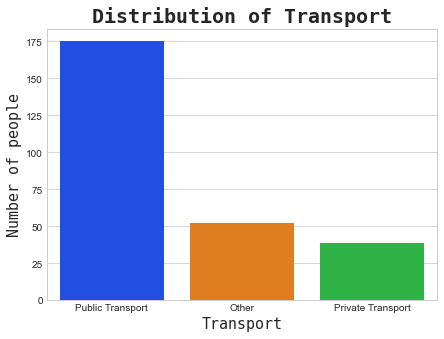

Public Transport     175
Other                 52
Private Transport     39
Name: Transport, dtype: int64


In [11]:
# Creating a barplot for 'Transport'
transport = df_train['Transport'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(transport.index, transport.values, palette='bright')
plt.title('Distribution of Transport', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Transport', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

print(transport)

Grafik menunjukkan distribusi data label 'Transport' tidak merata dengan perbandingan 175:52:39 untuk kategori 'Public Transport', 'Others', 'Private Transport' 

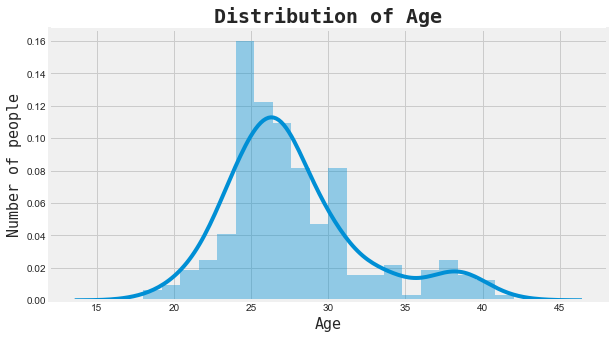

In [12]:
# Creating a distribution plot for 'Age'
age = df_train['Age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df_train['Age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Grafik menunjukkan kalau instance pada dataset dengan umur antara 24 sampai 27 memiliki jumlah paling banyak. 

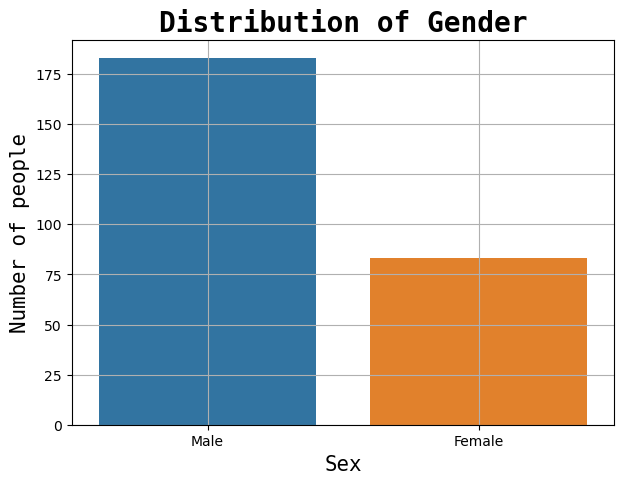

Male      183
Female     83
Name: Gender, dtype: int64

In [13]:
# Creating a barplot for 'Gender'
gender = df_train['Gender'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(gender.index, gender.values)
plt.title('Distribution of Gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

gender

Jumlah laki-laki pada dataset lebih banyak dari perempuan dengan perbandingan 183:83.

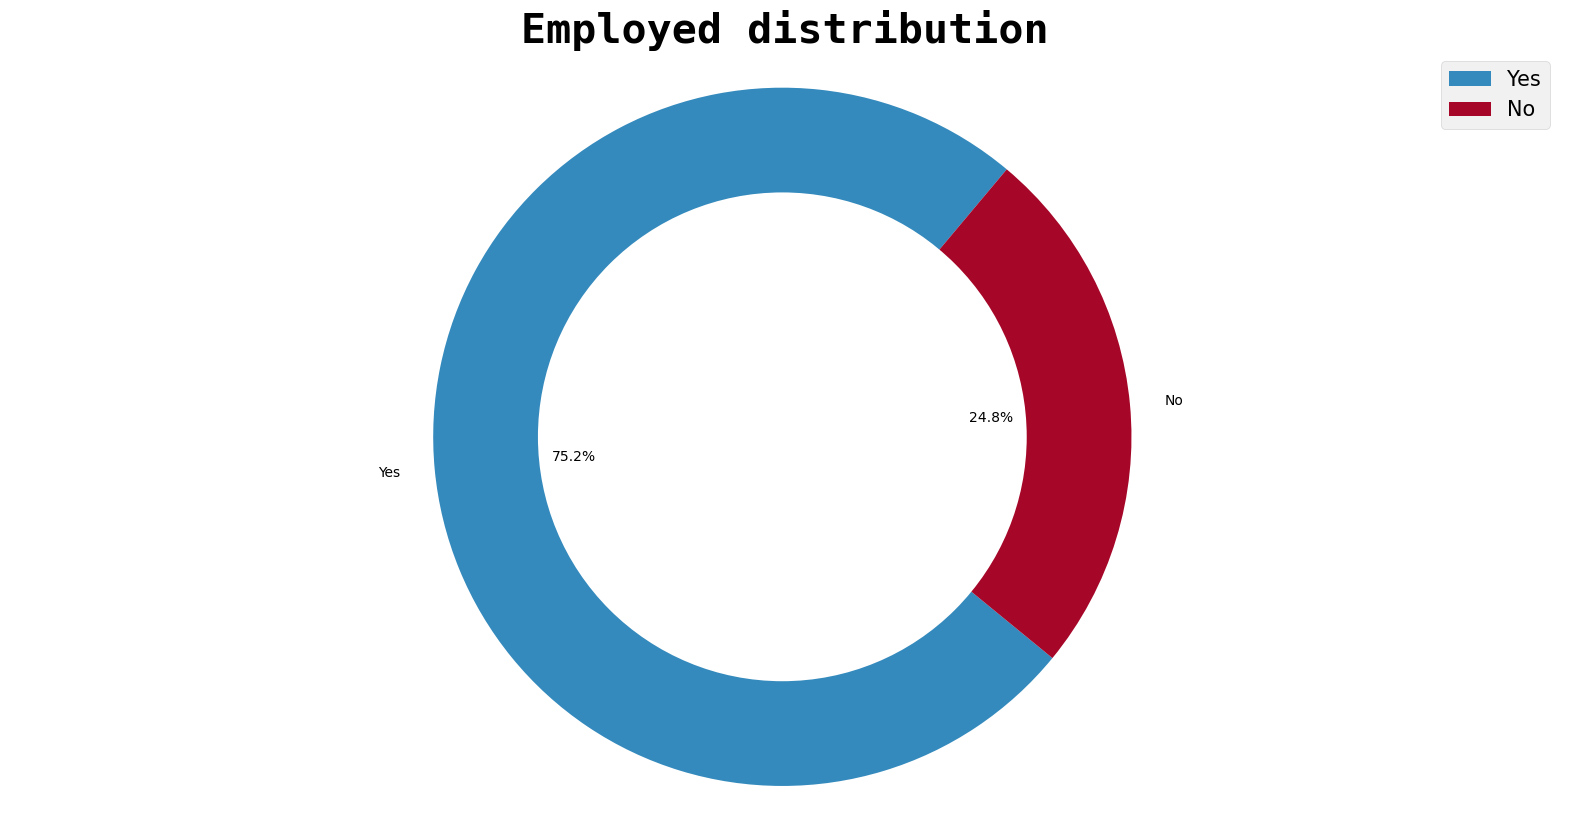

Yes    200
No      66
Name: Employed, dtype: int64

In [14]:
# Creating a donut chart for 'Employed'
employed = df_train['Employed'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(employed.values, labels=employed.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Employed distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

employed

Dengan asumsi jika atribut 'Employed' bernilai 1 maka berarti sudah bekerja dan 0 berarti tidak bekerja, maka jumlah orang yang tidak bekerja lebih banyak dari orang yang sudah bekerja dengan perbandingan 200:66.

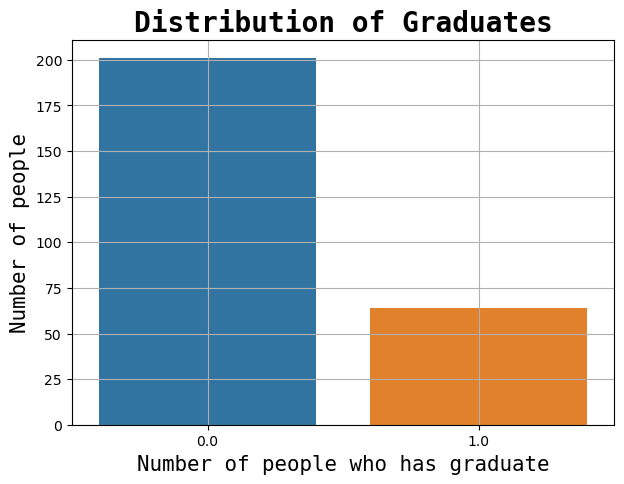

0.0    201
1.0     64
Name: Graduate, dtype: int64

In [15]:
# Creating a barplot for 'Graduate'
graduate = df_train['Graduate'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(graduate.index, graduate.values)
plt.title('Distribution of Graduates', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people who has graduate', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

graduate

Dengan asumsi jika atribut 'Graduate' bernilai 1 maka berarti sudah sarjana dan 0 berarti tidak sarjana, maka jumlah orang yang tidak lulus sarjana lebih banyak dari orang yang sudah sarjana dengan perbandingan 202:64.

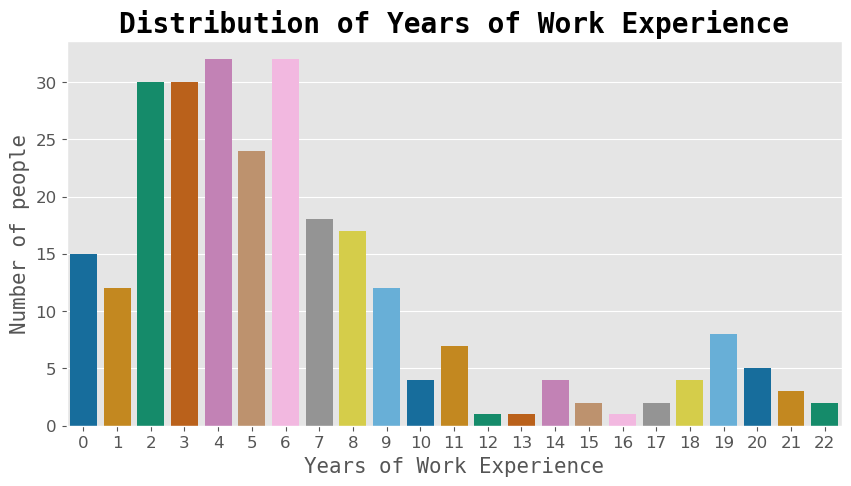

In [16]:
# Creating a barplot for 'Work Exp'
work_exp = df_train['Work Exp'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(work_exp.index, work_exp.values, palette='colorblind')
plt.title('Distribution of Years of Work Experience', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Work Experience', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Instance dengan pengalaman kerja 2, 3, 4, dan 6 tahun memiliki porsi yang besar pada dataset dengan jumlah >= 30 orang.

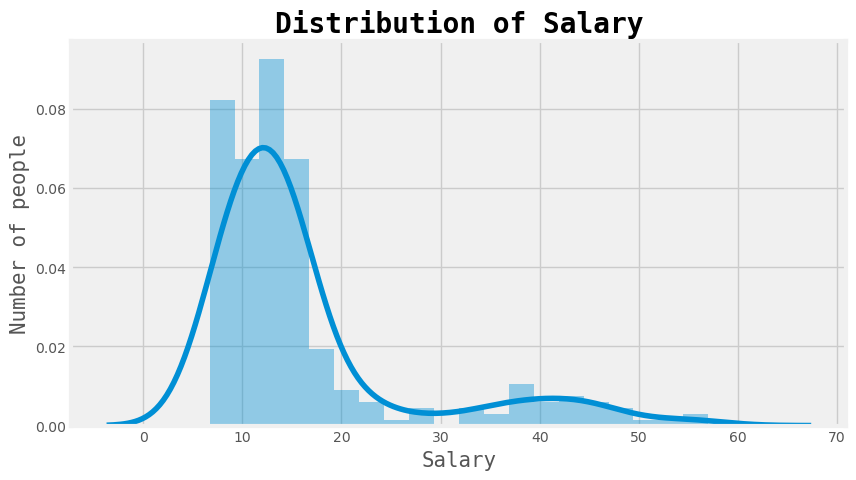

In [17]:
# Creating a distribution plot for 'Salary'
salary = df_train['Salary'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df_train['Salary'], bins=20)
plt.title('Distribution of Salary', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Salary', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Jumlah instance dengan Salary antara 7 - 16 memiliki jumlah paling banyak.

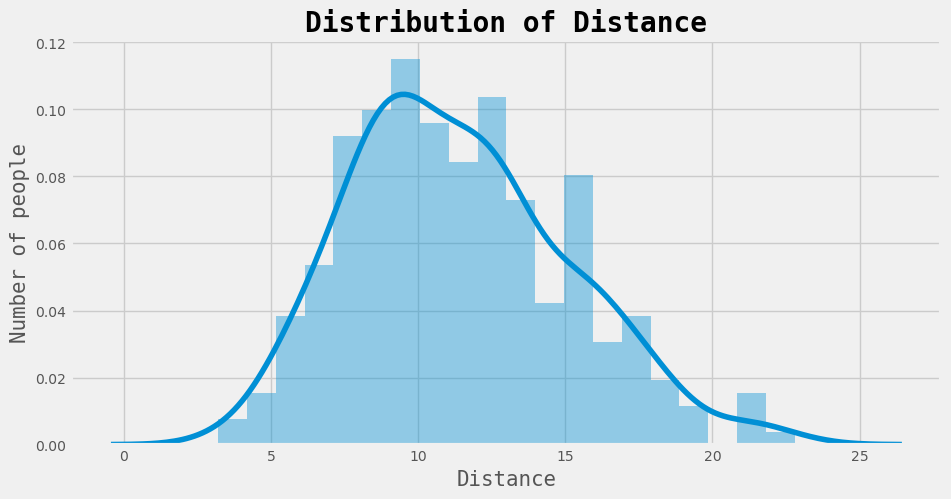

In [18]:
# Creating a barplot for 'Distance'
df_train['Distance'].unique()

distance = df_train['Distance'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df_train['Distance'], bins=20)
plt.title('Distribution of Distance', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Distance', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Atribut 'Distance' diasumsikan sebagai jarak dari rumah menuju suatu tempat. Sebagian besar instance memiliki atribut 'Distance' bernilai dengan kisaran antara 7-11 berjumlah sekitar 10% dari keseluruhan dataset.

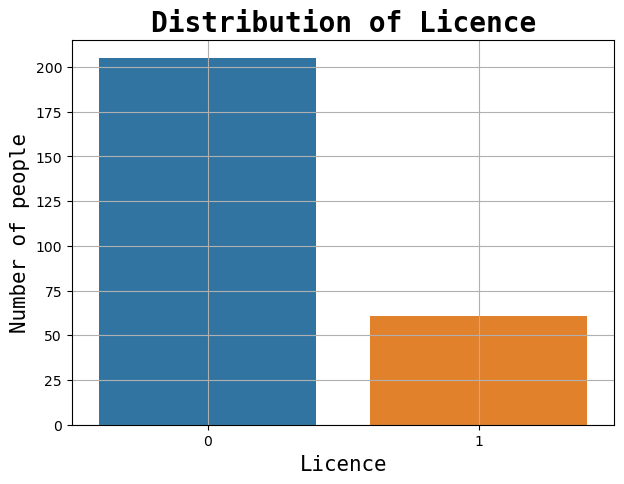

0    205
1     61
Name: Licence, dtype: int64

In [19]:
# Creating a barplot for 'Licence'
licence = df_train['Licence'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(licence.index, licence.values)
plt.title('Distribution of Licence', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Licence', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

licence

Dengan asumsi jika atribut 'Licence' bernilai 1 berarti sudah memiliki SIM dan 0 berarti tidak punya SIM, maka jumlah orang yang tidak punya SIM lebih banyak dari orang yang sudah punya SIM dengan perbandingan 205:61.

### Hasil analisis
* Pada dataset ini, sebagian besar orang adalah laki-laki, berusia 24-27 tahun, tidak bekerja, tidak sarjana, berpengalaman kerja 2, 3, 4, dan 6 tahun dengan penghasilan 7 - 16, rumahnya berjarak 7 - 11 menuju tempat tujuan, dan tidak punya SIM.

## 3. Data Preprocessing

### 3.1 Memberi nilai untuk missing values

In [21]:
df_train['Graduate'] = df_train['Graduate'].fillna(df_train['Graduate'].mode()[0])

Null values diatasi dengan memberikan nilai modus dari kolom yang memiliki null value tersebut. Karena hanya ada 1 instance yang kosong pada dataset yaitu pada kolom Graduate, maka seharusnya pengaruh / efek dari pemberian nilai modus pada null values tidaklah signifikan. Selain itu, atribut Graduate juga tidak memiliki korelasi yang kuat dengan label.

### 3.2 Ubah data categorical menjadi numerik

In [22]:
gender_dict = {'Female':0, 'Male': 1}
emp_dict = {'Yes':0, 'No': 1}
transport_dict = {'Private Transport':0, 'Other':1, 'Public Transport':2}

df_train['Gender'] = df_train['Gender'].map(gender_dict)
df_train['Employed'] = df_train['Employed'].map(emp_dict)
df_train['Transport'] = df_train['Transport'].map(transport_dict)

df_validate['Gender'] = df_validate['Gender'].map(gender_dict)
df_validate['Employed'] = df_validate['Employed'].map(emp_dict)
df_validate['Transport'] = df_validate['Transport'].map(transport_dict)

df_test['Gender'] = df_test['Gender'].map(gender_dict)
df_test['Employed'] = df_test['Employed'].map(emp_dict)

In [23]:
df_train

,ID,Age,Gender,Employed,Graduate,Work Exp,Salary,Distance,Licence,Transport
0,0,35,0,0,0.0,15,37.0,13.5,1,0
1,1,29,0,1,0.0,7,14.6,9.2,0,1
2,2,29,0,1,0.0,7,14.6,7.7,0,2
3,3,25,0,1,0.0,3,9.9,14.6,0,2
4,4,28,1,0,0.0,5,13.6,7.9,0,2
...,...,...,...,...,...,...,...,...,...,...
261,261,31,1,0,0.0,10,14.9,12.1,0,2
262,262,38,0,0,0.0,20,43.0,17.0,1,0
263,263,27,1,0,0.0,4,13.8,12.4,0,2
264,264,30,1,0,1.0,11,35.0,18.3,1,0


### 3.3 Mengatasi data imbalanced

In [24]:
X_train = df_train[['Age', 'Gender', 'Employed', 'Graduate', 'Work Exp', 'Salary',
       'Distance', 'Licence']]
y_train = df_train['Transport']

X_val = df_validate[['Age', 'Gender', 'Employed', 'Graduate', 'Work Exp', 'Salary',
       'Distance', 'Licence']]
y_val = df_validate['Transport']

X_test = df_test[['Age', 'Gender', 'Employed', 'Graduate', 'Work Exp', 'Salary',
       'Distance', 'Licence']]

In [25]:
!pip install imbalanced-learn

In [26]:
# # Use SMOTE oversampling to resample data
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)

In [27]:
# # Checking the counts of label categories
# transport = df_train['Transport'].value_counts(normalize=True)
# round(transport * 100, 2).astype('str') + ' %'

Code di atas sengaja tidak dieksekusi karena setelah dieksekusi mengakibatkan nilai macro average dari f1-score semua metode menjadi turun.

### 3.4 Pemilihan feature

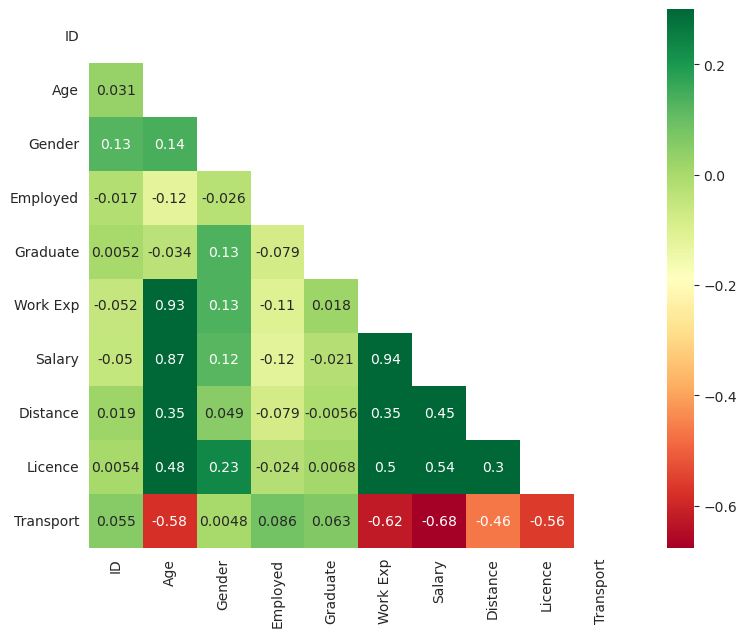

In [69]:
corr = df_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.show()

Dari heatmap dapat terlihat atribut yang memiliki korelasi tertinggi dengan label adalah atribut 'Salary', 'Work Exp', 'Age', 'Licence', dan 'Distance'.

In [29]:
# X_train = X_train[['Salary', 'Work Exp', 'Age', 'Licence', 'Distance']]
# X_val = X_val[['Salary', 'Work Exp', 'Age', 'Licence', 'Distance']]
# X_test = X_test[['Salary', 'Work Exp', 'Age', 'Licence', 'Distance']]

Code di atas sengaja tidak dieksekusi karena setelah dieksekusi mengakibatkan nilai macro average dari f1-score semua metode menjadi turun. Asumsi saat ini, hal ini bisa terjadi karena pattern yang ditangkap model menjadi terlalu general.

## 4. Data Modelling

### 4.1 Decision Tree

In [30]:
# Create 2 dt model: gini and entropy
dtree_gini = DecisionTreeClassifier(criterion="gini")
dtree_gini.fit(X_train, y_train)

dtree_ent = DecisionTreeClassifier(criterion="entropy")
dtree_ent.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
# Predict the model to validation and test data
validate_tree_gini = dtree_gini.predict(X_val)
validate_tree_ent = dtree_ent.predict(X_val)

test_tree_gini = dtree_gini.predict(X_test)
test_tree_ent = dtree_ent.predict(X_test)

Text(0.5, 1.0, 'Gini Tree')

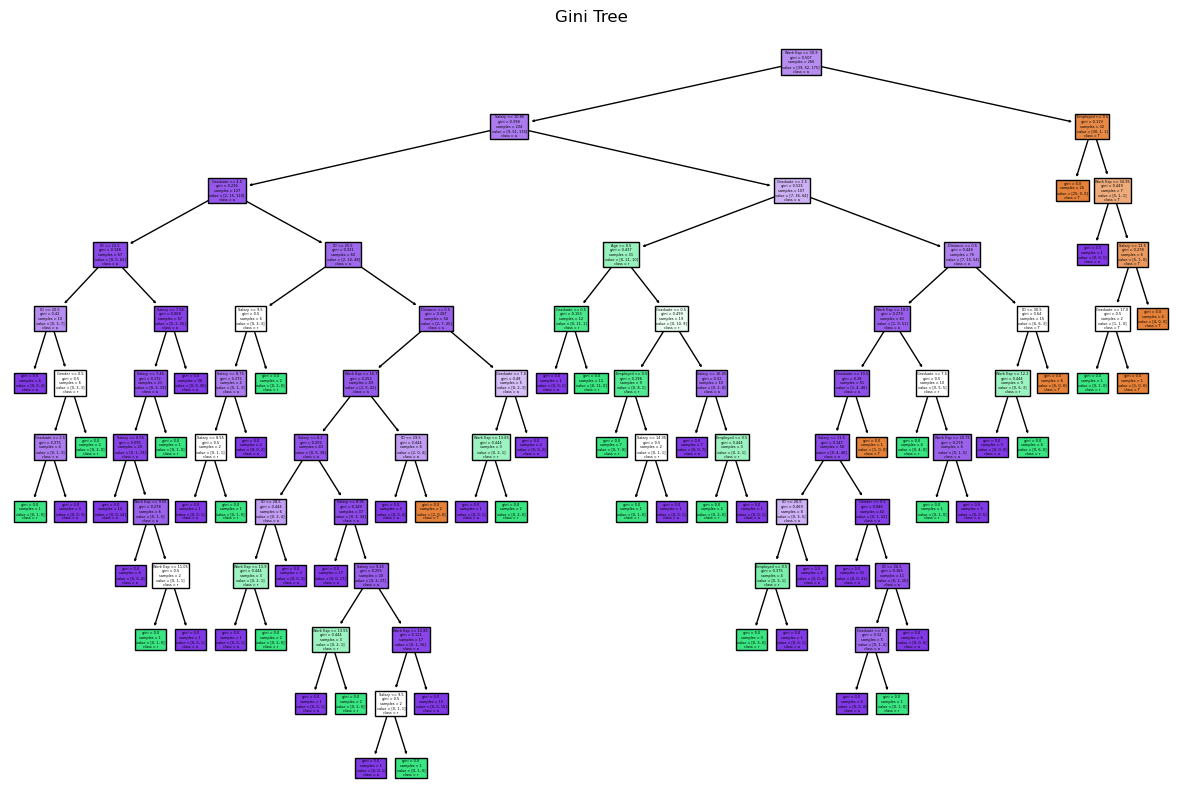

In [32]:
# Visualization of the tree
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dtree_gini, 
                   feature_names=df_train.columns[:-1],  
                   class_names=df_train.columns[-1],
                   filled=True)
plt.title('Gini Tree')

Text(0.5, 1.0, 'Entropy Tree')

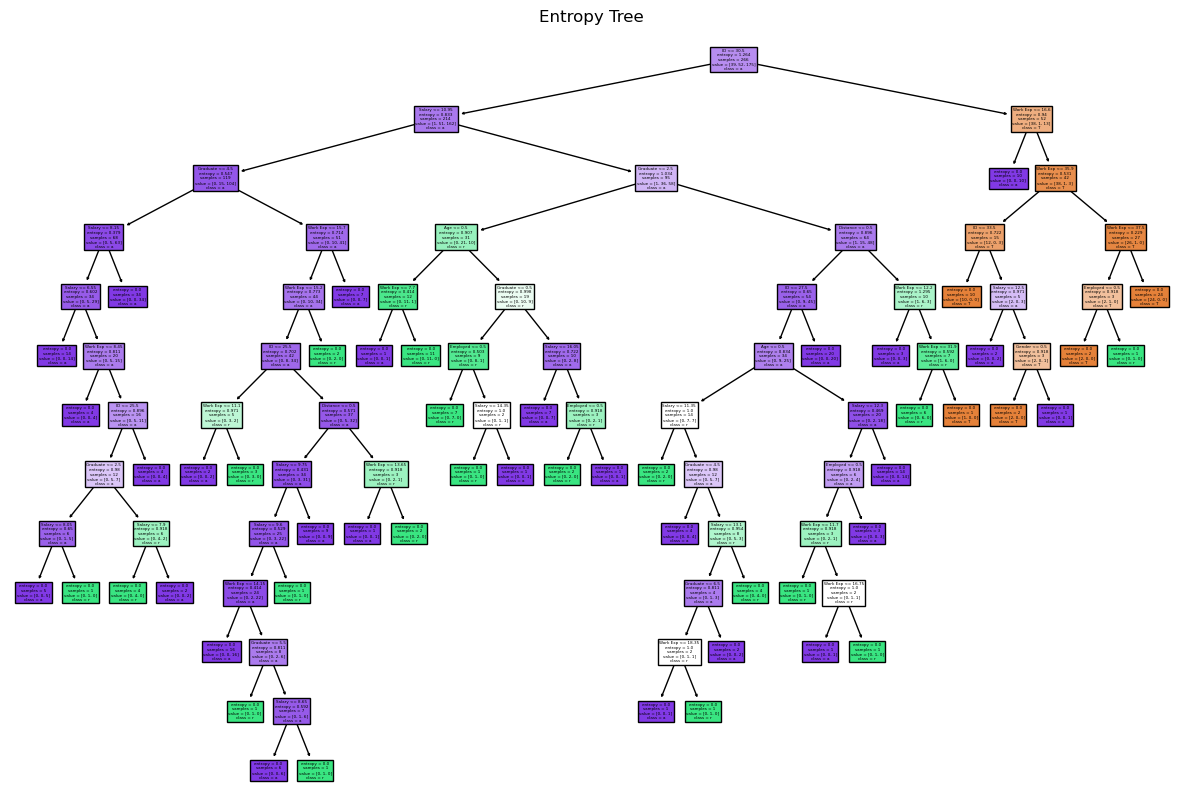

In [33]:
# Visualization of the tree
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dtree_ent, 
                   feature_names=df_train.columns[:-1],  
                   class_names=df_train.columns[-1],
                   filled=True)
plt.title('Entropy Tree')

In [34]:
from sklearn.metrics import classification_report

print("Classification report: \n", classification_report(y_val, validate_tree_gini))

Classification report: 
               precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.50      0.75      0.60        16
           2       0.88      0.75      0.81        65

    accuracy                           0.74        89
   macro avg       0.64      0.71      0.67        89
weighted avg       0.78      0.74      0.75        89



In [35]:
print("Classification report: \n", classification_report(y_val, validate_tree_ent))

Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.60      0.75      0.67        16
           2       0.90      0.85      0.87        65

    accuracy                           0.81        89
   macro avg       0.71      0.74      0.72        89
weighted avg       0.82      0.81      0.81        89



### Hasil analisis
* Metric yang dilihat untuk model decision tree di atas adalah f1-score yang merupakan rata-rata dari precision dan recall yang dibobotkan. 

## 4.2 Logistic Regression

In [36]:
grid = {"C": np.logspace(-3,3,7),
        "penalty": ["l1","l2"],
        "max_iter": [1000, 2000, 3000, 4000, 5000],
        "solver": ['liblinear']
       }

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train, y_train)

print("Tuned hyperparameters: ", logreg_cv.best_params_)
print("Accuracy :", logreg_cv.best_score_)

Tuned hyperparameters:  {'C': 1.0, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.7894586894586894


In [37]:
log_before = LogisticRegression()
log_before.fit(X_train, y_train)

# After Grid Search
log_after = LogisticRegression(C=100.0, penalty='l1', max_iter=1000, solver='liblinear')
log_after.fit(X_train, y_train)

LogisticRegression(C=100.0, max_iter=1000, penalty='l1', solver='liblinear')

In [38]:
val_log_before = log_before.predict(X_val)
val_log_after = log_after.predict(X_val)

test_log_before = log_before.predict(X_test)
test_log_after = log_after.predict(X_test)

In [39]:
print("Classification report: \n", classification_report(y_val, val_log_before))

Classification report: 
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.75      0.19      0.30        16
           2       0.82      0.97      0.89        65

    accuracy                           0.79        89
   macro avg       0.69      0.55      0.56        89
weighted avg       0.78      0.79      0.75        89



In [40]:
print("Classification report: \n", classification_report(y_val, val_log_after))

Classification report: 
               precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.75      0.38      0.50        16
           2       0.83      0.91      0.87        65

    accuracy                           0.80        89
   macro avg       0.73      0.68      0.68        89
weighted avg       0.80      0.80      0.78        89



### 4.3 Support Vector Machine

In [41]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}  

svmm = svm.SVC()
svmm_cv=GridSearchCV(svmm, param_grid, cv=10)
svmm_cv.fit(X_train, y_train)

print("Tuned hyperparameters: ", svmm_cv.best_params_)
print("Accuracy:", svmm_cv.best_score_)

Tuned hyperparameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.8195156695156696


In [42]:
svm_before = svm.SVC()
svm_before.fit(X_train, y_train) 

svm_after = svm.SVC(C=100, gamma=0.01, kernel='rbf')
svm_after.fit(X_train, y_train) 

SVC(C=100, gamma=0.01)

In [43]:
val_svm_before = svm_before.predict(X_val)
val_svm_after = svm_after.predict(X_val)

test_svm_before = svm_before.predict(X_test)
test_svm_after = svm_after.predict(X_test)

In [44]:
print("Report SVM Before: \n", classification_report(y_val, val_svm_before))

Report SVM Before: 
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.00      0.00      0.00        16
           2       0.75      0.94      0.84        65

    accuracy                           0.73        89
   macro avg       0.42      0.48      0.45        89
weighted avg       0.59      0.73      0.66        89



In [45]:
print("Report SVM After: \n", classification_report(y_val, val_svm_after))

Report SVM Before: 
               precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.47      0.44      0.45        16
           2       0.84      0.88      0.86        65

    accuracy                           0.78        89
   macro avg       0.71      0.65      0.67        89
weighted avg       0.77      0.78      0.77        89



### 4.4 Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'criterion': ['gini', 'entropy']}  

rff = RandomForestClassifier(random_state=42)
rff_cv=GridSearchCV(rff, param_grid, cv=10)
rff_cv.fit(X_train, y_train)

print("Tuned hyperparameters: ", rff_cv.best_params_)
print("Accuracy:", rff_cv.best_score_)

Tuned hyperparameters:  {'criterion': 'gini', 'n_estimators': 300}
Accuracy: 0.8495726495726496


In [47]:
rf = RandomForestClassifier(n_estimators=300, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [48]:
validate_rf = rf.predict(X_val)
test_rf = rf.predict(X_test)

In [49]:
print("Report RF: \n", classification_report(y_val, validate_rf))

Report RF: 
               precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.60      0.56      0.58        16
           2       0.89      0.89      0.89        65

    accuracy                           0.82        89
   macro avg       0.72      0.73      0.73        89
weighted avg       0.82      0.82      0.82        89



In [50]:
test_rf

array([2, 1, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0,
       2], dtype=int64)

## 5. Result

### 5.1 Mengembalikan label menjadi bentuk kategorikal

In [51]:
test_rf_map = []
reverse_trp_dict = {0:'Private Transport', 1:'Other', 2:'Public Transport'}
for i in test_rf:
    test_rf_map.append(reverse_trp_dict[i])

### 5.2 Simpan ke .csv file

Submission akan menggunakan hasil dari model Random Forest yang memberikan akurasi paling baik.

In [52]:
result = pd.DataFrame()
result['Transport'] = test_rf_map
result.to_csv("submission2.csv", index_label = ['ID'])

### 5.3 Eksperimen Selanjutnya

Untuk meningkatkan nilai dari submission, dataset train dan validate bisa digabung dan model Random Forest dibentuk ulang menggunakan dataset gabungan tersebut.

In [68]:
combined_df = pd.concat([df_train, df_validate])
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 0 to 88
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         355 non-null    int64  
 1   Age        355 non-null    int64  
 2   Gender     355 non-null    int64  
 3   Employed   355 non-null    int64  
 4   Graduate   355 non-null    float64
 5   Work Exp   355 non-null    int64  
 6   Salary     355 non-null    float64
 7   Distance   355 non-null    float64
 8   Licence    355 non-null    int64  
 9   Transport  355 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 30.5 KB


In [57]:
X = combined_df[['Age', 'Gender', 'Employed', 'Graduate', 'Work Exp', 'Salary',
       'Distance', 'Licence']]
y = combined_df['Transport']

In [58]:
X.head(2)

,Age,Gender,Employed,Graduate,Work Exp,Salary,Distance,Licence
0,35,0,0,0.0,15,37.0,13.5,1
1,29,0,1,0.0,7,14.6,9.2,0


In [61]:
y.head(5)

0    0
1    1
2    2
3    2
4    2
Name: Transport, dtype: int64

In [62]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'criterion': ['gini', 'entropy']}  

rfff = RandomForestClassifier(random_state=42)
rfff_cv=GridSearchCV(rff, param_grid, cv=10)
rfff_cv.fit(X, y)

print("Tuned hyperparameters: ", rfff_cv.best_params_)
print("Accuracy:", rfff_cv.best_score_)

Tuned hyperparameters:  {'criterion': 'entropy', 'n_estimators': 100}
Accuracy: 0.8365873015873015


In [63]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf.fit(X, y)

RandomForestClassifier(criterion='entropy', random_state=42)

In [64]:
test_rf_combined = rf.predict(X_test)

In [65]:
test_rf_map = []
reverse_trp_dict = {0:'Private Transport', 1:'Other', 2:'Public Transport'}
for i in test_rf_combined:
    test_rf_map.append(reverse_trp_dict[i])

In [66]:
result = pd.DataFrame()
result['Transport'] = test_rf_map
result[:5]

,Transport
0,Public Transport
1,Other
2,Public Transport
3,Private Transport
4,Public Transport


In [67]:
result.to_csv("submission3.csv", index_label = ['ID'])